In [1]:
import numpy as np
import matplotlib.pyplot as plt


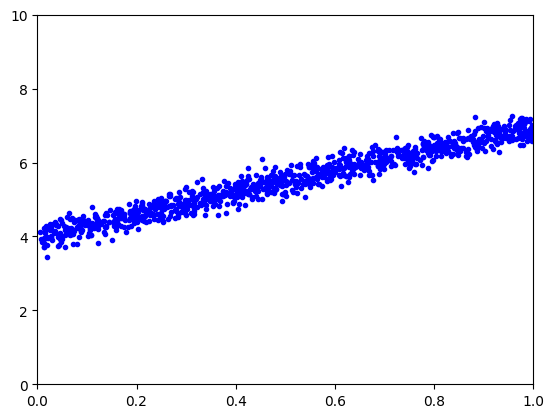

In [2]:
# Tạo 1000 điểm dữ liệu được chọn gần với đường thẳng y=4+3x
X = np.random.rand(1000, 1)
y = 4 + 3 * X + 0.2 * np.random.randn(1000, 1)  # noise added
plt.plot(X.T, y.T, "b.")
plt.axis([0, 1, 0, 10])
plt.show()

In [3]:
# Building Xbar
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis=1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_lr = np.dot(np.linalg.pinv(A), b)
print("Solution found by formula: w = ", w_lr.T)

Solution found by formula: w =  [[4.00963942 2.96377987]]


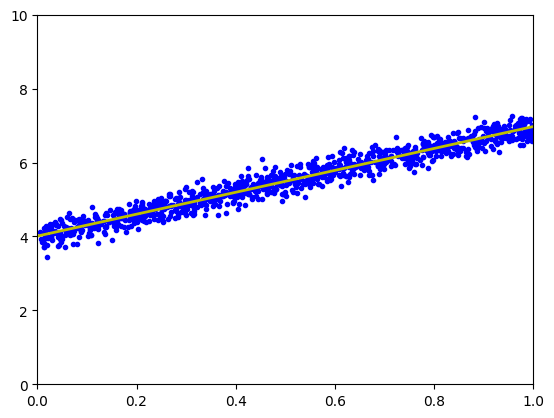

In [4]:
# Display result
w = w_lr
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w_0 + w_1 * x0

# Draw the fitting line
plt.plot(X.T, y.T, "b.")  # data
plt.plot(x0, y0, "y", linewidth=2)  # the fitting line
plt.axis([0, 1, 0, 10])
plt.show()

Đường thẳng tìm được là đường có màu vàng có phương trình y≈4+2.998x.

Hàm mất mát
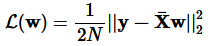

Đạo hàm của hàm mất mát
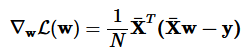

In [5]:
# Hàm mất mát
def cost(w):
    N = Xbar.shape[0]
    return 0.5 / N * np.linalg.norm(y - Xbar.dot(w), 2) ** 2


# Đạo hàm
def grad(w):
    N = Xbar.shape[0]
    return 1 / N * Xbar.T.dot(Xbar.dot(w) - y)

In [6]:
def gd(w_init, grad, eta):
    w = [w_init]
    for it in range(100):
        w_new = w[-1] - eta * grad(w[-1])
        if np.linalg.norm(grad(w_new)) / len(w_new) < 1e-3: # Độ dốc trung bình đủ nhỏ
            # np.linalg.norm(grad(w_new)): tổng độ dốc
            break
        w.append(w_new)
    return (w, it)


w_init = np.array([[2], [1]])
(w1, it1) = gd(w_init, grad, 1)
print("Solution found by GD: w = ", w1[-1].T, ",\nafter %d iterations." % (it1 + 1))

Solution found by GD: w =  [[4.0250817  2.93499553]] ,
after 48 iterations.
